In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class NeuralNetwork:
    def __init__(self, input_size, output_size, hidden_size, learning_rate, weight_decay):
        '''
        NN hyperparameters initialization
        '''
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay

        ''' 
        Xavier initialization:
        These serve as good starting points for initialization and mitigate the chances of exploding or vanishing gradients.
        They set the weights neither too much bigger than 1, nor too much less than 1. So, the gradients do not vanish or explode too quickly.
        This helps to avoid slow convergence, also ensuring that we do not keep oscillating off the minima.
        '''
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(1 / self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(1 / self.output_size)

        self.b1 = 0.0
        self.b2 = 0.0

    def forward(self, x):
        '''
        x - 8x8 input matrix
        W1 - 8x3 hidden layer weight matrix
        W2 - 3x8 output layer weight matrix

        b1 - 8x1 bias vector of the output layer
        b2 - 8x1 bias vector of the hidden layer
        '''
        self.a2 = sigmoid(np.dot(x, self.W1) + self.b1)
        self.a3 = sigmoid(np.dot(self.a2, self.W2) + self.b2)

        return self.a3

    def backward(self, x, y):
        # the number of training samples
        m = x.shape[1]

        # since we use MSE as a cost function
        delta_3 = (self.a3 - y) * sigmoid_prime(self.a3)
        d_w2 = np.dot(self.a2.T, delta_3)
        db2 = (1.0 / m) * np.sum(delta_3, axis=0, keepdims=True)

        delta_2 = np.dot(delta_3, self.W2.T) * sigmoid_prime(self.a2)
        d_w1 = np.dot(x.T, delta_2)
        db1 = (1.0 / m) * np.sum(delta_2, axis=0, keepdims=True)

        D1 = (1.0 / m) * (d_w1 + self.weight_decay * self.W1)
        D2 = (1.0 / m) * (d_w2 + self.weight_decay * self.W2)


        # updating the weights and biases
        self.W1 -= self.learning_rate * D1
        self.W2 -= self.learning_rate * D2

        self.b1 -= self.learning_rate * db1
        self.b2 -= self.learning_rate * db2

        return self.W1, self.W2, self.b1, self.b2


# activation function and its derivative
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def sigmoid_prime(s):
    return s * (1 - s)

# loss (cost) function == MSE
def mse(y_true, y_pred):
    return (1/2) * np.mean(np.power(y_true - y_pred, 2))


# inputs initialization
input_data = []

for i in range(8):
	temp = []
	for j in range(8):
		if i == j:
			temp.append(1)
		else:
			temp.append(0)
	input_data.append(temp)
 
input_data = np.asarray(input_data)

In [86]:
# initialization of the hyperparameters
input_size = 8
hidden_size = 3
output_size = 8

learning_rate = 10.0
weight_decay = 0.00001

iterations = 50000

# model initialization
net = NeuralNetwork(input_size, output_size, hidden_size, learning_rate, weight_decay)

# training loop
for i in range(iterations):
    net.forward(input_data)
    net.backward(input_data, input_data)

print("MSELoss =", mse(input_data, net.forward(input_data))) 
print("Predicted Probability Output: \n", net.forward(input_data).round(3))
print("\n")
print("Predicted Output: \n", np.asarray([[1 if item > 0.5 else 0 for item in row] for row in net.forward(input_data)]))
print("\n")
print("Activation of Hidden layer\n", net.a2.round(3))
print("\n")
print("Weights 1 of Hidden layer\n", net.W1.round(3))
print("\n")
# print("Weights 2 of Output layer\n", net.W2.round(3))

MSELoss = 4.2971865230940706e-05
Predicted Probability Output: 
 [[0.981 0.014 0.    0.01  0.    0.    0.    0.011]
 [0.009 0.98  0.    0.    0.011 0.    0.014 0.   ]
 [0.    0.    0.983 0.01  0.    0.011 0.    0.01 ]
 [0.014 0.    0.009 0.98  0.    0.    0.009 0.   ]
 [0.    0.01  0.    0.    0.982 0.008 0.    0.01 ]
 [0.    0.    0.009 0.    0.011 0.983 0.01  0.   ]
 [0.    0.01  0.    0.014 0.    0.011 0.98  0.   ]
 [0.01  0.    0.01  0.    0.01  0.    0.    0.983]]


Predicted Output: 
 [[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


Activation of Hidden layer
 [[0.023 0.009 0.728]
 [0.02  0.755 0.992]
 [0.975 0.019 0.044]
 [0.024 0.236 0.008]
 [0.985 0.986 0.967]
 [0.97  0.955 0.015]
 [0.02  0.991 0.245]
 [0.976 0.029 0.98 ]]


Weights 1 of Hidden layer
 [[-3.661 -4.728  1.087]
 [-3.822  1.126  4.905]
 [ 3.735 -3.972 -2.977]
 [-3.648 -1.177 -4.7  ]
 [ 4.241  4.26   3.479]
 [ 

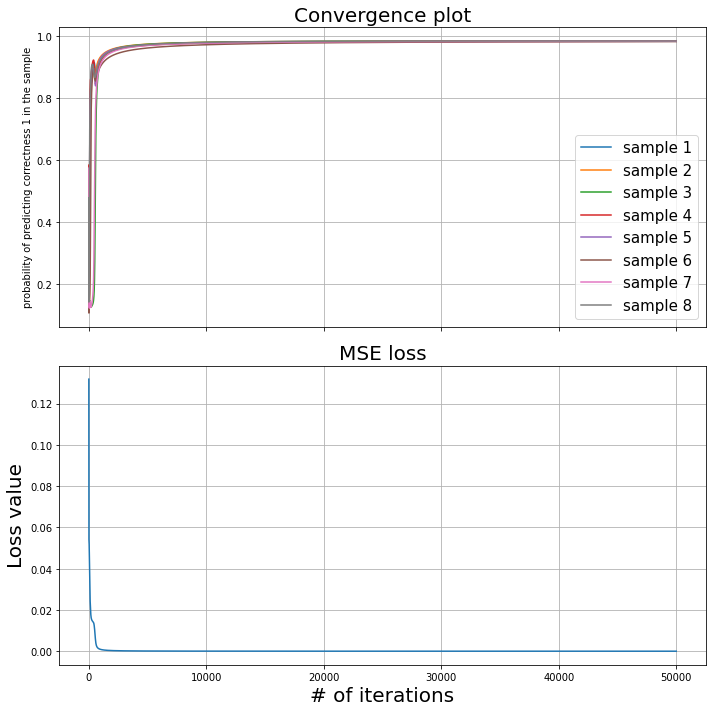

In [87]:
# visualization of MSE and convergence of each sample
input_size = 8
hidden_size = 3
output_size = 8

learning_rate = 10.0
weight_decay = 0.00001

net = NeuralNetwork(input_size, output_size, hidden_size, learning_rate, weight_decay)

ax_x = []
errors = []
predictions = []


for i in range(50001):
    ax_x.append(i)
    prediction = net.forward(input_data)
    predictions.append(prediction)
    w_1, w_2, b_1, b_2 = net.backward(input_data, input_data)

    error = mse(input_data, prediction)
    errors.append(error)


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))

ax2.plot(ax_x, np.array(errors))
ax2.set_title('MSE loss', fontsize=20)
ax1.set_title("Convergence plot", fontsize=20)

predictions = np.array(predictions)

for i in range(8):
  ax1.plot(ax_x, predictions[:, i, i], label=f'sample {i+1}')

# set labels and font size
ax2.set_xlabel('# of iterations', fontsize = 20)
ax2.set_ylabel('Loss value', fontsize = 20)

ax1.set_ylabel('probability of predicting correctness 1 in the sample')

ax1.legend(fontsize=15)
fig.tight_layout()

ax1.grid()
ax2.grid()
plt.show()

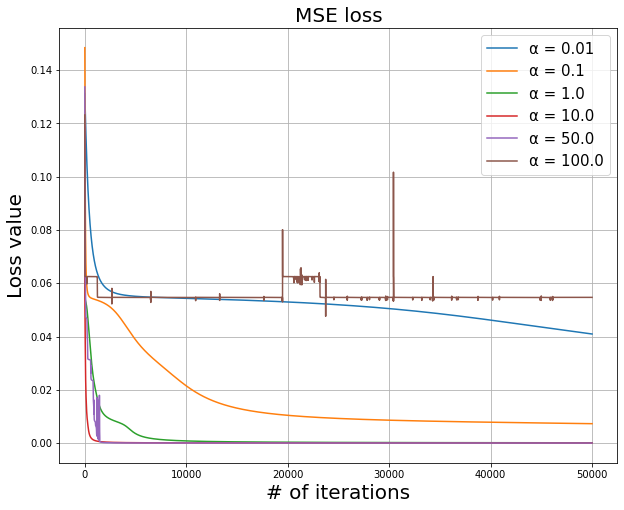

In [88]:
# visualization of MSE and convergence of each sample
input_size = 8
hidden_size = 3
output_size = 8

lr = [0.01, 0.1, 1.0, 10.0, 50.0, 100.0]
preds = []
plt.figure(figsize=(10, 8))


for lrate in lr:
    learning_rate = lrate
    weight_decay = 0.00001

    net = NeuralNetwork(input_size, output_size, hidden_size, learning_rate, weight_decay)

    ax_x = []
    errors = []
    predictions = []


    for i in range(50001):
        ax_x.append(i)
        prediction = net.forward(input_data)
        predictions.append(prediction)
        w_1, w_2, b_1, b_2 = net.backward(input_data, input_data)

        error = mse(input_data, prediction)
        errors.append(error)

    preds.append(errors)

k = 0
for lrate in lr:
  plt.plot(ax_x, np.array(preds[k]), label=f'α = {lrate}')
  k +=1

plt.title('MSE loss', fontsize=20)

# set labels and font size
plt.xlabel('# of iterations', fontsize = 20)
plt.ylabel('Loss value', fontsize = 20)


plt.legend(fontsize=15)

plt.grid()
plt.show()

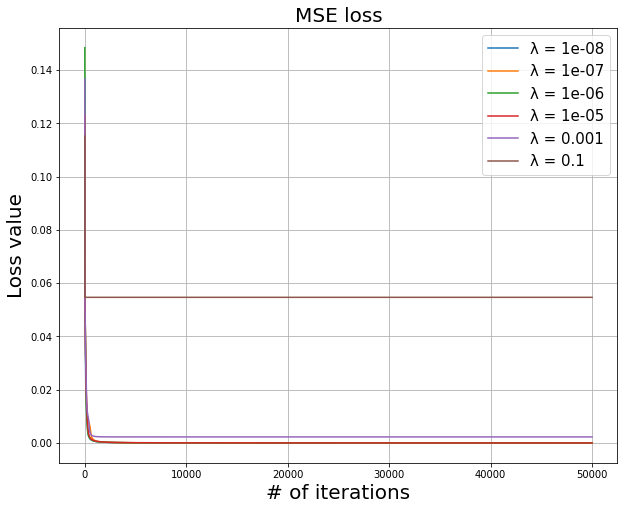

In [89]:
# visualization of MSE and convergence of each sample
input_size = 8
hidden_size = 3
output_size = 8

wd = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.001, 0.1]
preds_wd = []
plt.figure(figsize=(10, 8))


for weightd in wd:
    learning_rate = 10.0
    weight_decay = weightd

    net = NeuralNetwork(input_size, output_size, hidden_size, learning_rate, weight_decay)

    ax_x = []
    errors = []
    predictions = []


    for i in range(50001):
        ax_x.append(i)
        prediction = net.forward(input_data)
        predictions.append(prediction)
        w_1, w_2, b_1, b_2 = net.backward(input_data, input_data)

        error = mse(input_data, prediction)
        errors.append(error)

    preds_wd.append(errors)

k = 0
for weightd in wd:
  plt.plot(ax_x, np.array(preds_wd[k]), label=f'λ = {weightd}')
  k +=1

plt.title('MSE loss', fontsize=20)

# set labels and font size
plt.xlabel('# of iterations', fontsize = 20)
plt.ylabel('Loss value', fontsize = 20)


plt.legend(fontsize=15)

plt.grid()
plt.show()

In [92]:
#Tuning parameters learning rate and weight decay
learning_rate = [0.1, 0.3, 1, 3, 5,10]
weight_decay = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
summary_df = pd.DataFrame({"alpha":[],"lambda":[],"min_cost": []})
iterations = 10000
input_size = 8
hidden_size = 3
output_size = 8

a = 10.0
l = 0.00001

for a in learning_rate:
    for l in weight_decay:       
        net = NeuralNetwork(input_size, output_size, hidden_size, a, l)
        for i in range(iterations):
            net.forward(input_data)
            net.backward(input_data, input_data)
        summary_df_output = pd.DataFrame({"alpha":[a],"lambda":[l],"min_cost": [mse(input_data, net.forward(input_data))]})
        summary_df = summary_df.append(summary_df_output)

summary_df.sort_values(['min_cost'], inplace = True)
print(summary_df)

   alpha   lambda  min_cost
0   10.0  0.00001  0.000071
0    5.0  0.00001  0.000167
0    3.0  0.00001  0.000227
0   10.0  0.00010  0.000304
0    5.0  0.00010  0.000360
0    3.0  0.00010  0.000379
0    1.0  0.00001  0.000791
0    1.0  0.00010  0.000865
0    5.0  0.00100  0.002301
0   10.0  0.00100  0.002303
0    3.0  0.00100  0.002311
0    1.0  0.00100  0.003028
0    0.3  0.00100  0.007029
0    0.3  0.00010  0.009873
0    0.3  0.00001  0.014417
0    0.1  0.00010  0.018739
0   10.0  0.01000  0.019702
0    3.0  0.01000  0.019702
0    5.0  0.01000  0.019702
0    1.0  0.01000  0.022719
0    0.3  0.01000  0.024050
0    0.1  0.00100  0.025232
0    0.1  0.00001  0.025272
0    0.1  0.01000  0.037336
0    5.0  1.00000  0.054687
0    1.0  1.00000  0.054687
0    1.0  0.10000  0.054687
0   10.0  1.00000  0.054687
0    3.0  0.10000  0.054688
0   10.0  0.10000  0.054688
0    5.0  0.10000  0.054688
0    3.0  1.00000  0.054688
0    0.3  1.00000  0.054688
0    0.3  0.10000  0.054688
0    0.1  1.00000  0